In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [ ]:
# load habitability data
df = pd.read_excel("planetary systems with habitability.xlsx", sheet_name="Sheet1")

In [ ]:
# drop rows with too many nulls
features = ['pl_eqt', 'pl_insol', 'pl_orbeccen', 'pl_rade', 'pl_masse', 'st_teff', 'st_lum']
df['null_count'] = df[features].isnull().sum(axis=1)
df = df[df['null_count'] <= 2].copy()
df.drop(columns=['null_count'], inplace=True)

In [ ]:
# normalise features
scaler = MinMaxScaler()
df_scaled = df.copy()
df_scaled[features] = scaler.fit_transform(df[features])

In [ ]:
# dimensionality reduction & drop rows with NaN in features before PCA
df_pca = df_scaled.dropna(subset=features).copy()
pca = PCA(n_components=2)
pca_features = pca.fit_transform(df_pca[features])
df_pca['pca_1'] = pca_features[:, 0]
df_pca['pca_2'] = pca_features[:, 1]

In [ ]:
# clustering (4 clusters) & drop rows with NaN in features before clustering
df_cluster = df_scaled.dropna(subset=features).copy()
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df_cluster['cluster'] = kmeans.fit_predict(df_cluster[features])
# merge cluster labels back to the original df_scaled
df_scaled.loc[df_cluster.index, 'cluster'] = df_cluster['cluster']

In [ ]:
# map cluster labels
cluster_names = {
    0: "Warm Gas Giants",
    1: "Low-Luminosity Small Planets",
    2: "Temperate Small Planets",
    3: "Orbital Wildcards"
}

df_scaled['cluster_label'] = df_scaled['cluster'].map(cluster_names)

In [ ]:
# merge habitability and name
df_scaled['pl_name'] = df['pl_name'].values
if 'habitability_percent' in df.columns:
    df_scaled['habitability_percent'] = df['habitability_percent'].values

In [ ]:
# export to Excel
export_cols = ['pl_name', 'habitability_percent', 'cluster', 'cluster_label'] + features
final_df = df_scaled[export_cols].copy()
final_df.to_excel("planetary_clusters_labeled.xlsx", index=False)

Visualisations

In [ ]:
sns.set(style="whitegrid")

PCA scatter with cluster labels

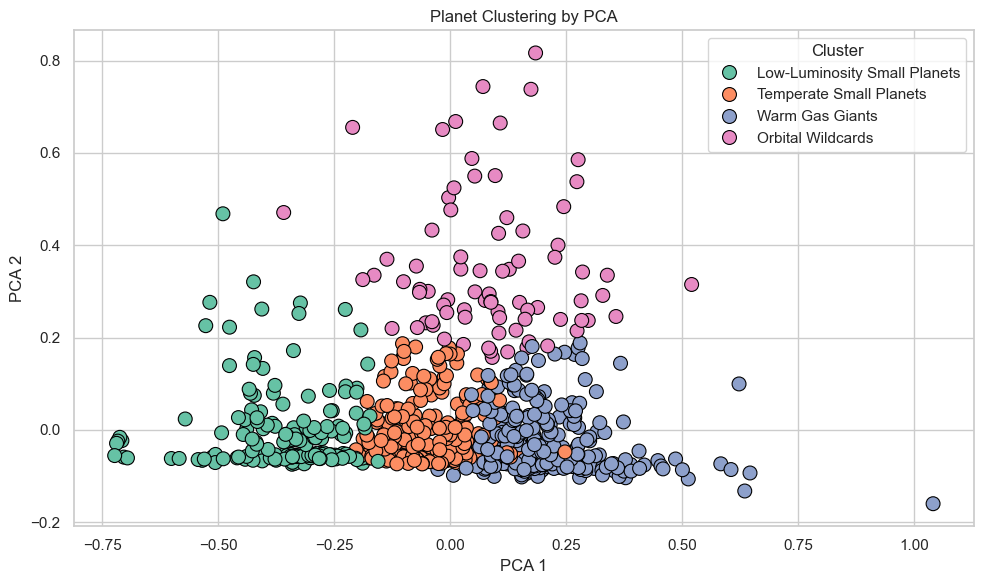

In [ ]:
# merge cluster_label from df_scaled into df_pca if not present
if 'cluster_label' not in df_pca.columns:
    df_pca = df_pca.merge(
        df_scaled[['pl_name', 'cluster_label']],
        on='pl_name',
        how='left'
    )

plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='pca_1', y='pca_2', hue='cluster_label', data=df_pca,
    palette='Set2', s=100, edgecolor='black')
plt.title("Planet Clustering by PCA")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()

Boxplots per feature by cluster

C:\Users\ErinFogarty\AppData\Local\Temp\ipykernel_10728\876035676.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster_label', y=feature, data=df_scaled, palette="Set3")


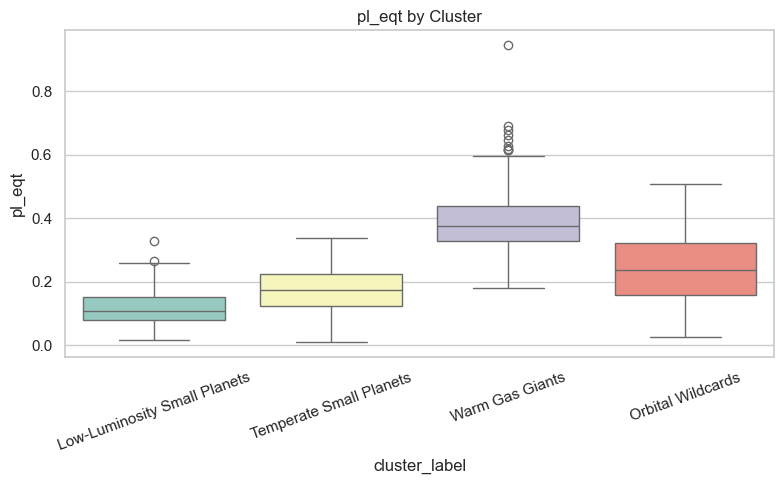

C:\Users\ErinFogarty\AppData\Local\Temp\ipykernel_10728\876035676.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster_label', y=feature, data=df_scaled, palette="Set3")


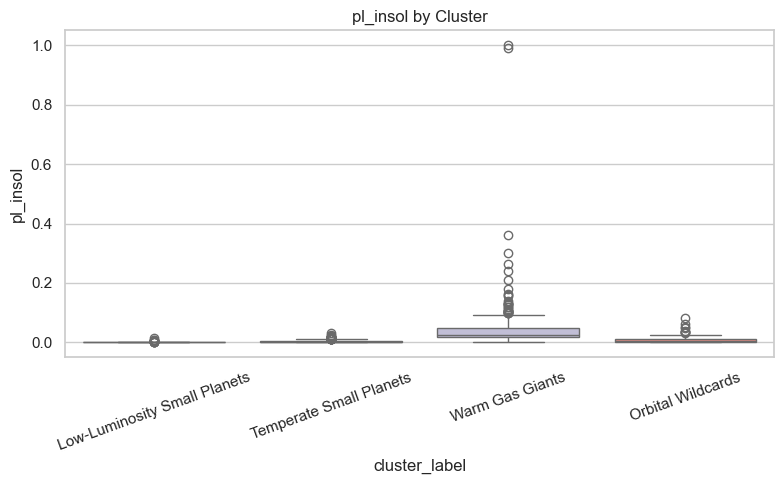

C:\Users\ErinFogarty\AppData\Local\Temp\ipykernel_10728\876035676.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster_label', y=feature, data=df_scaled, palette="Set3")


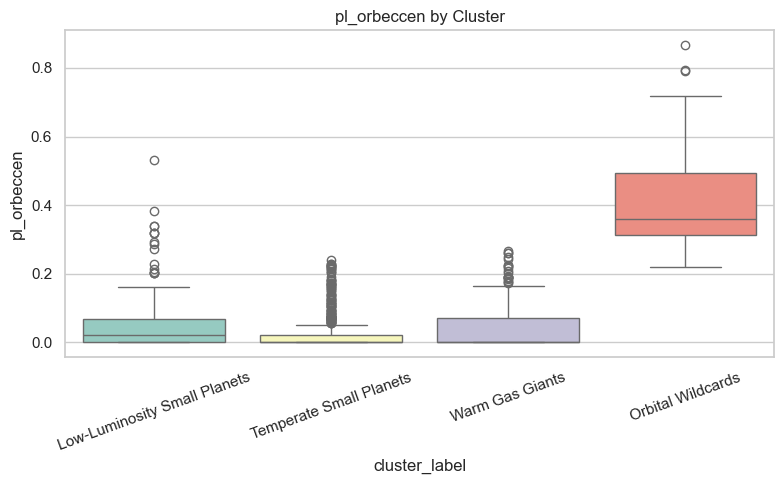

C:\Users\ErinFogarty\AppData\Local\Temp\ipykernel_10728\876035676.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster_label', y=feature, data=df_scaled, palette="Set3")


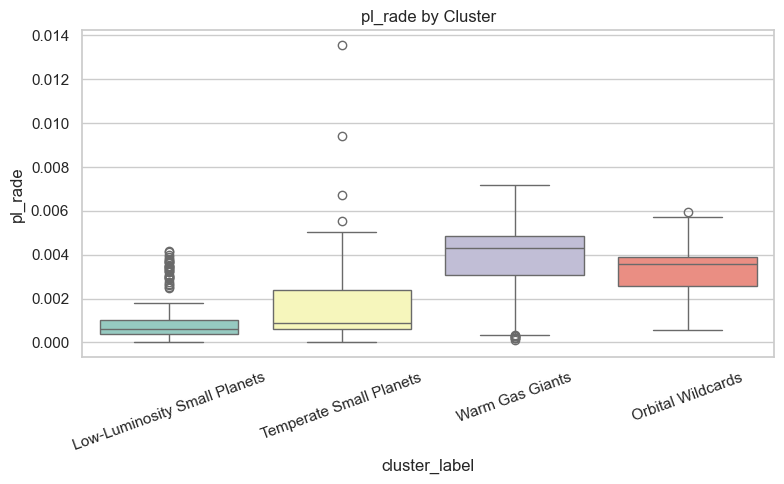

C:\Users\ErinFogarty\AppData\Local\Temp\ipykernel_10728\876035676.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster_label', y=feature, data=df_scaled, palette="Set3")


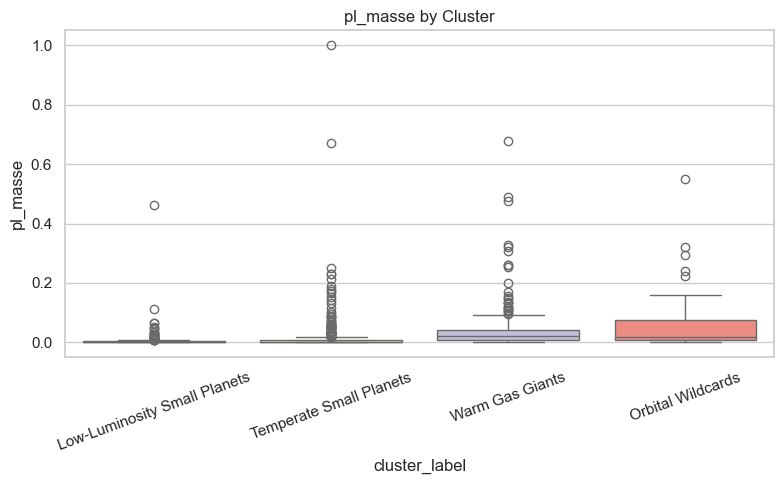

C:\Users\ErinFogarty\AppData\Local\Temp\ipykernel_10728\876035676.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster_label', y=feature, data=df_scaled, palette="Set3")


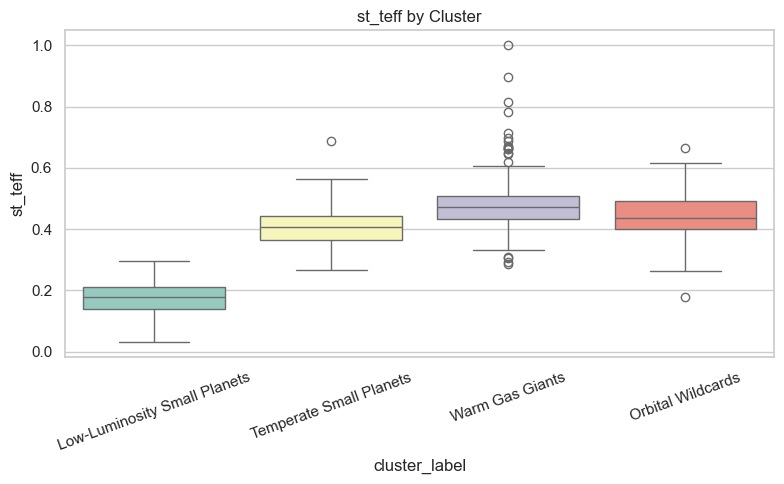

C:\Users\ErinFogarty\AppData\Local\Temp\ipykernel_10728\876035676.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster_label', y=feature, data=df_scaled, palette="Set3")


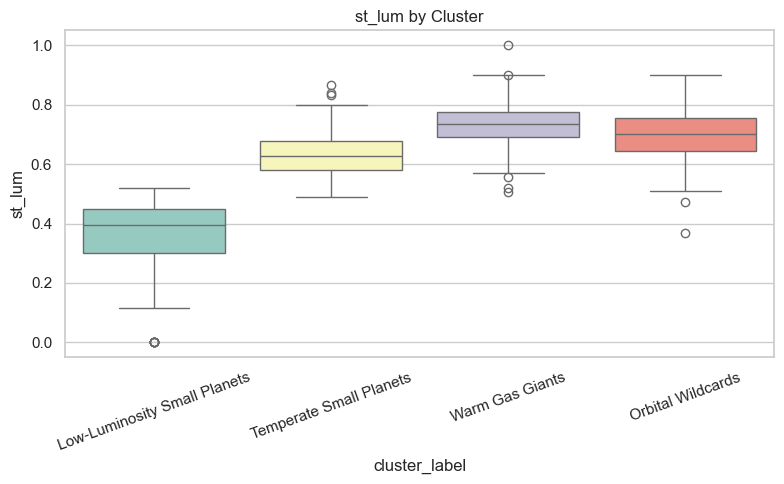

In [ ]:
for feature in features:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='cluster_label', y=feature, data=df_scaled, palette="Set3")
    plt.title(f"{feature} by Cluster")
    plt.xticks(rotation=20)
    plt.tight_layout()
    plt.show()

Distribution of habitability per cluster

C:\Users\ErinFogarty\AppData\Local\Temp\ipykernel_10728\1901015902.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster_label', y='habitability_percent', data=df_scaled, palette="coolwarm")


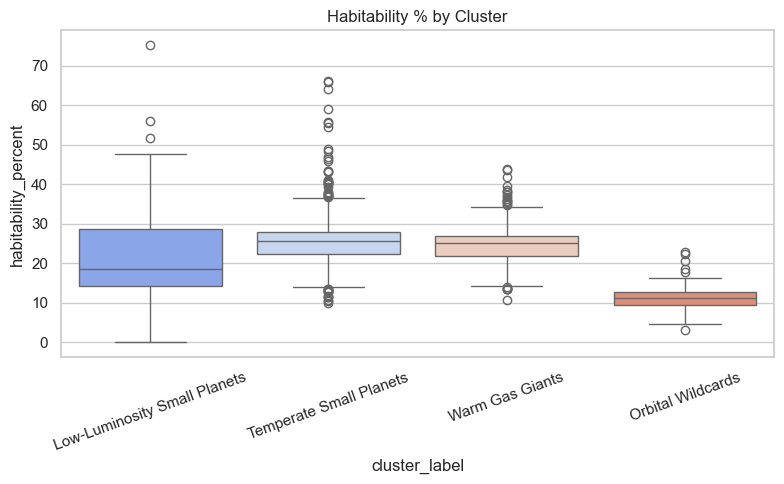

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='cluster_label', y='habitability_percent', data=df_scaled, palette="coolwarm")
plt.title("Habitability % by Cluster")
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()

Cluster means

In [ ]:
print("\n Cluster feature means:")
print(df_scaled.groupby('cluster')[features + ['habitability_percent']].mean().round(2))


 Cluster feature means:
         pl_eqt  pl_insol  pl_orbeccen  pl_rade  pl_masse  st_teff  st_lum  \
cluster                                                                      
0.0        0.39      0.05         0.04      0.0      0.04     0.48    0.73   
1.0        0.12      0.00         0.06      0.0      0.01     0.18    0.36   
2.0        0.18      0.00         0.02      0.0      0.01     0.40    0.63   
3.0        0.24      0.01         0.41      0.0      0.06     0.44    0.69   

        habitability_percent  
cluster                       
0.0                25.022611  
1.0                 21.52152  
2.0                26.063607  
3.0                11.398101  


Number of planets per cluster

In [ ]:
print("\n Number of planets per cluster:")
print(df_scaled['cluster_label'].value_counts())


 Number of planets per cluster:
cluster_label
Temperate Small Planets         524
Warm Gas Giants                 314
Low-Luminosity Small Planets    171
Orbital Wildcards                79
Name: count, dtype: int64


In [ ]:
# save summary stats
summary_stats = df_scaled.groupby('cluster_label')[features + ['habitability_percent']].mean().round(2)
summary_stats['count'] = df_scaled['cluster_label'].value_counts()
summary_stats.to_excel("planetary_cluster_summary.xlsx")